In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import scipy as sy
import tensorflow as tf
import keras as ke
import torch as pt

In [19]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [3]:
foodFP = pd.read_csv ('../Final_Project/food-footprints.csv')
foodFP

,Entity,Code,Year,"GHG emissions per kilogram (Poore & Nemecek, 2018)"
0,Apples,NaN,2010,0.43
1,Bananas,NaN,2010,0.86
2,Barley,NaN,2010,1.18
3,Beef (beef herd),NaN,2010,99.48
4,Beef (dairy herd),NaN,2010,33.30
...,...,...,...,...
33,Soymilk,NaN,2010,0.98
34,Tofu (soybeans),NaN,2010,3.16
35,Tomatoes,NaN,2010,2.09
36,Wheat & Rye,NaN,2010,1.57


In [4]:
# view data shape
foodFP.shape

(38, 4)

In [5]:
#view different data types
print(type(foodFP))

<class 'pandas.core.frame.DataFrame'>


In [21]:
print(isinstance(foodFP, float))

False


In [22]:
# Rename lengthy columns
foodFP.rename(columns = {'GHG emissions per kilogram (Poore & Nemecek, 2018)':'Emissions_2018', 'Entity':'Food'}, inplace = True)
foodFP

,Food,Code,Year,Emissions_2018,Food_F
0,Apples,NaN,2010,0.43,0
1,Bananas,NaN,2010,0.86,1
2,Barley,NaN,2010,1.18,2
3,Beef (beef herd),NaN,2010,99.48,3
4,Beef (dairy herd),NaN,2010,33.30,4
...,...,...,...,...,...
33,Soymilk,NaN,2010,0.98,33
34,Tofu (soybeans),NaN,2010,3.16,34
35,Tomatoes,NaN,2010,2.09,35
36,Wheat & Rye,NaN,2010,1.57,36


In [8]:
import mitosheet
mitosheet.sheet(foodFP, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-d69d6147-a0ed-438d-811f-75b8f4eb15b9", "code": {"imports…

In [10]:
# to get the different values in our Food column
print(foodFP['Food'].unique())

['Apples' 'Bananas' 'Barley' 'Beef (beef herd)' 'Beef (dairy herd)'
 'Beet Sugar' 'Berries & Grapes' 'Brassicas' 'Cane Sugar' 'Cassava'
 'Cheese' 'Citrus Fruit' 'Coffee' 'Dark Chocolate' 'Eggs' 'Fish (farmed)'
 'Groundnuts' 'Lamb & Mutton' 'Maize' 'Milk' 'Nuts' 'Oatmeal'
 'Onions & Leeks' 'Other Fruit' 'Other Pulses' 'Other Vegetables' 'Peas'
 'Pig Meat' 'Potatoes' 'Poultry Meat' 'Prawns (farmed)' 'Rice'
 'Root Vegetables' 'Soymilk' 'Tofu (soybeans)' 'Tomatoes' 'Wheat & Rye'
 'Wine']


In [11]:
# Applying a function to recode some columns
def NameOfFood(Food):
    if Food == "Apples":
        return 0
    if Food == "Bananas":
        return 1
    if Food == "Barley":
        return 2
    if Food == "Beef (beef herd)":
        return 3
    if Food == "Beef (dairy herd)":
        return 4
    if Food == "Beet Sugar":
        return 5
    if Food == "Berries & Grapes":
        return 6
    if Food == "Brassicas":
        return 7
    if Food == "Cane Sugar":
        return 8
    if Food == "Cassava":
        return 9
    if Food == "Cheese":
        return 10
    if Food == "Citrus Fruit":
        return 11
    if Food == "Coffee":
        return 12
    if Food == "Dark Chocolate":
        return 13
    if Food == "Eggs":
        return 14
    if Food == "Fish (farmed)":
        return 15
    if Food == "Groundnuts":
        return 16
    if Food == "Lamb & Mutton":
        return 17
    if Food == "Maize":
        return 18
    if Food == "Milk":
        return 19
    if Food == "Nuts":
        return 20
    if Food == "Oatmeal":
        return 21
    if Food == "Onions & Leeks":
        return 22
    if Food == "Other Fruit":
        return 23
    if Food == "Other Pulses":
        return 24
    if Food == "Other Vegetables":
        return 25
    if Food == "Peas":
        return 26
    if Food == "Pig Meat":
        return 27
    if Food == "Potatoes":
        return 28
    if Food == "Poultry Meat":
        return 29
    if Food == "Prawns (farmed)":
        return 30
    if Food == "Rice":
        return 31
    if Food == "Root Vegetables":
        return 32
    if Food == "Soymilk":
        return 33
    if Food == "Tofu (soybeans)":
        return 34
    if Food == "Tomatoes":
        return 35
    if Food == "Wheat & Rye":
        return 36
    if Food == "Wine":
        return 37

In [12]:
# Let's apply the function
foodFP['Food_F'] = foodFP['Food'].apply(NameOfFood)
foodFP.head()

,Food,Code,Year,Emissions_2018,Food_F
0,Apples,NaN,2010,0.43,0
1,Bananas,NaN,2010,0.86,1
2,Barley,NaN,2010,1.18,2
3,Beef (beef herd),NaN,2010,99.48,3
4,Beef (dairy herd),NaN,2010,33.30,4


In [13]:
import mitosheet
mitosheet.sheet(foodFP, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-5e1c1d53-fb39-48ed-811d-8e1f65c74f5f", "code": {"imports…

In [14]:
# Checking the data types
foodFP.dtypes

Food               object
Code              float64
Year                int64
Emissions_2018    float64
Food_F              int64
dtype: object

In [15]:
# Drop the NaN values
print(foodFP.dropna(axis=0, how='all'))

                 Food  Code  Year  Emissions_2018  Food_F
0              Apples   NaN  2010            0.43       0
1             Bananas   NaN  2010            0.86       1
2              Barley   NaN  2010            1.18       2
3    Beef (beef herd)   NaN  2010           99.48       3
4   Beef (dairy herd)   NaN  2010           33.30       4
5          Beet Sugar   NaN  2010            1.81       5
6    Berries & Grapes   NaN  2010            1.53       6
7           Brassicas   NaN  2010            0.51       7
8          Cane Sugar   NaN  2010            3.20       8
9             Cassava   NaN  2010            1.32       9
10             Cheese   NaN  2010           23.88      10
11       Citrus Fruit   NaN  2010            0.39      11
12             Coffee   NaN  2010           28.53      12
13     Dark Chocolate   NaN  2010           46.65      13
14               Eggs   NaN  2010            4.67      14
15      Fish (farmed)   NaN  2010           13.63      15
16         Gro

In [26]:
# drop the code column
foodFP.drop(['Code'], axis=1)

,Food,Year,Emissions_2018,Food_F
0,Apples,2010,0.43,0
1,Bananas,2010,0.86,1
2,Barley,2010,1.18,2
3,Beef (beef herd),2010,99.48,3
4,Beef (dairy herd),2010,33.30,4
...,...,...,...,...
33,Soymilk,2010,0.98,33
34,Tofu (soybeans),2010,3.16,34
35,Tomatoes,2010,2.09,35
36,Wheat & Rye,2010,1.57,36


In [27]:
# View my data
foodFP

,Food,Code,Year,Emissions_2018,Food_F
0,Apples,NaN,2010,0.43,0
1,Bananas,NaN,2010,0.86,1
2,Barley,NaN,2010,1.18,2
3,Beef (beef herd),NaN,2010,99.48,3
4,Beef (dairy herd),NaN,2010,33.30,4
...,...,...,...,...,...
33,Soymilk,NaN,2010,0.98,33
34,Tofu (soybeans),NaN,2010,3.16,34
35,Tomatoes,NaN,2010,2.09,35
36,Wheat & Rye,NaN,2010,1.57,36


In [31]:
#make Food, Year and Emissions_2018 from folat into numeric ??????
# code from float to int.
# foodFP['Code'] = foodFP['Code'].astype(int)
# emissions from float to int.

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [32]:
# view my data
foodFP

,Food,Code,Year,Emissions_2018,Food_F
0,Apples,NaN,2010,0.43,0
1,Bananas,NaN,2010,0.86,1
2,Barley,NaN,2010,1.18,2
3,Beef (beef herd),NaN,2010,99.48,3
4,Beef (dairy herd),NaN,2010,33.30,4
...,...,...,...,...,...
33,Soymilk,NaN,2010,0.98,33
34,Tofu (soybeans),NaN,2010,3.16,34
35,Tomatoes,NaN,2010,2.09,35
36,Wheat & Rye,NaN,2010,1.57,36


In [33]:
import mitosheet
mitosheet.sheet(foodFP, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-107b8146-adc7-4ac2-8854-93108c3dbb6c", "code": {"imports…

In [39]:
# Exploration Time!
import plotly.express as px

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.bar(foodFP, x='Emissions_2018', y='Food')
fig.update_layout(
    title='Emissions in 2018, Food bar chart',
    title_font_color= '#45954c',
    barmode='group',
    xaxis=dict(
        rangeslider=dict(
            visible=True,
            thickness=.05
        )
    )
)
fig.show(renderer="iframe")

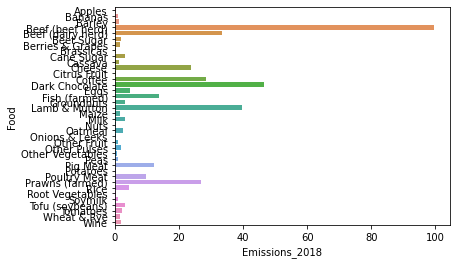

In [41]:
# importing the required library
import seaborn as sns
import matplotlib.pyplot as plt

# who v/s fare barplot
sns.barplot(x = 'Emissions_2018',
			y = 'Food',
			data = foodFP)

# Show the plot
plt.show()
